# Insurance Fraud Detection

Importing libraries and reading dataset

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [69]:
df=pd.read_csv("insuranceFraud.csv")

In [70]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [71]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Dropping the columns which we wont need in prediction

In [72]:
d=['policy_number','policy_bind_date','total_claim_amount','incident_date','incident_location','insured_zip','policy_state','incident_state','incident_city','insured_hobbies','auto_model','auto_make','auto_year','age']
df=df.drop(d,axis=1)

In [73]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N


Since there are '?' values, we replace them with nan so that we can impute those values later.

In [74]:
df=df.replace('?',np.nan)

In [75]:
df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,NaN,17440,8720,61040,N
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,NaN,18080,18080,72320,N
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,NaN,2,3,YES,7500,7500,52500,N
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,NaN,0,1,YES,5220,5220,36540,N


Having a look at the heatmap and seeing missing values in the whole dataset.

<AxesSubplot:>

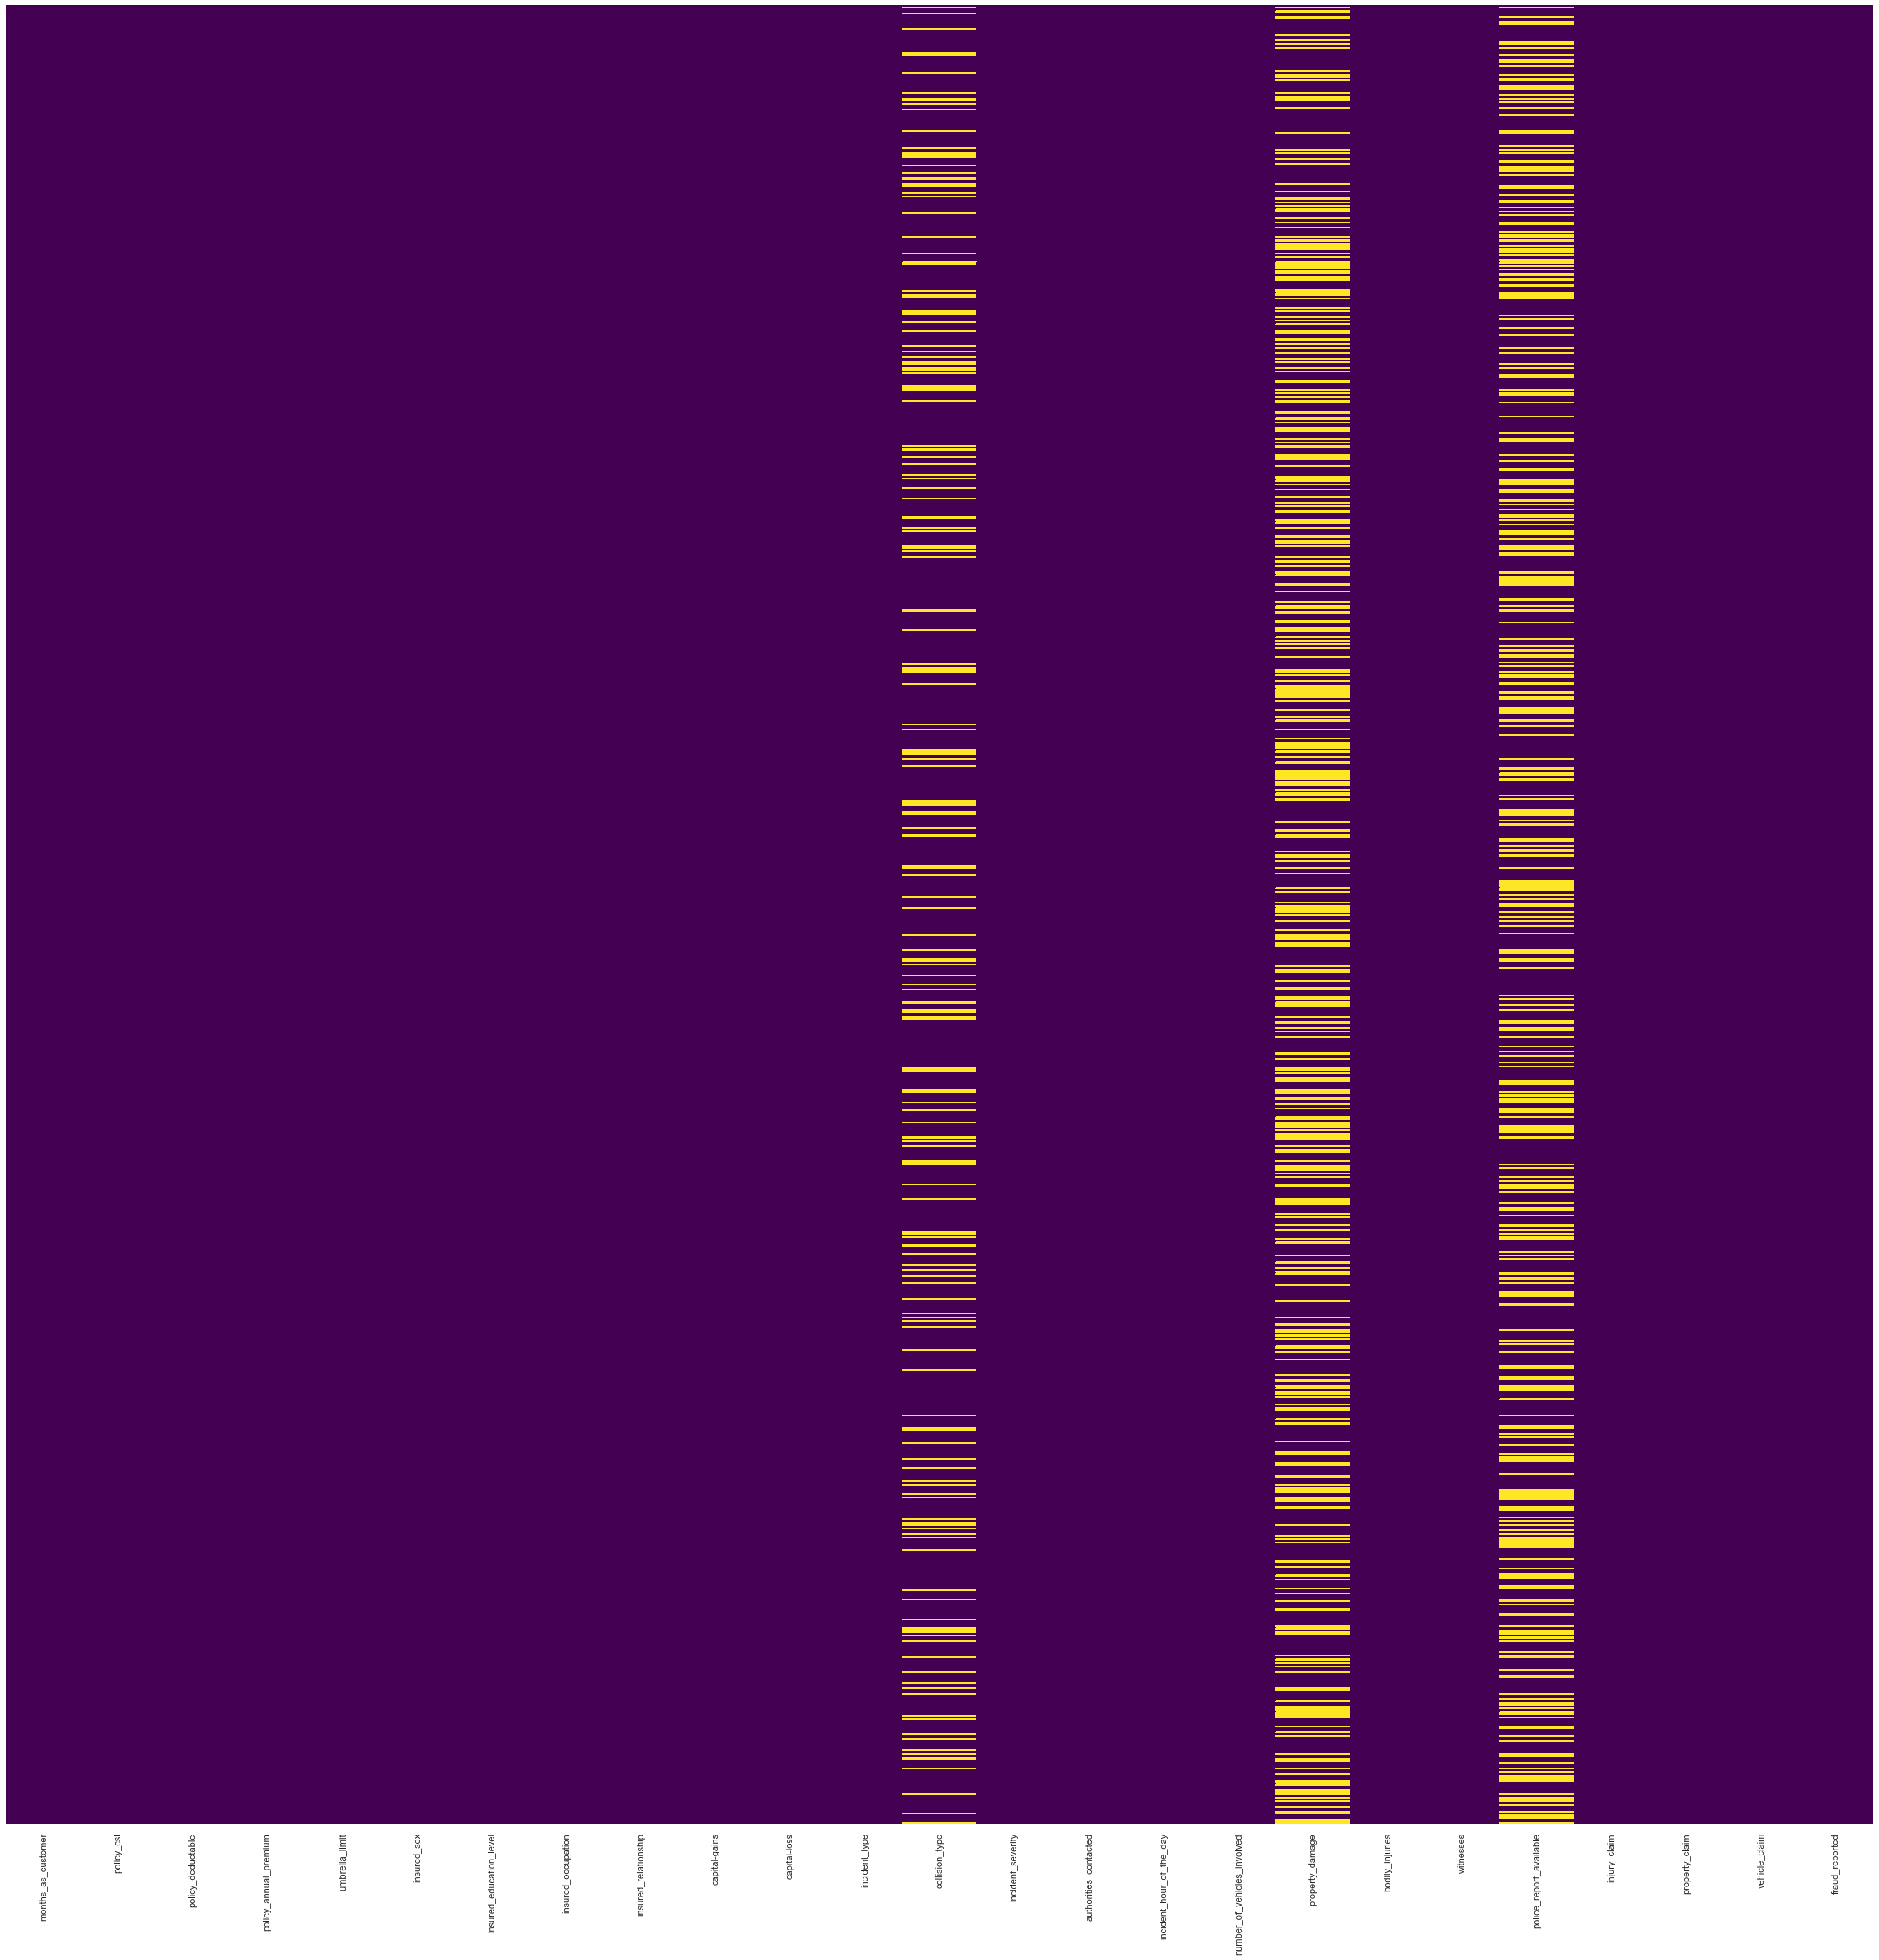

In [76]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [77]:
df.isna().sum()

months_as_customer               0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

Separating integral and categorical data.

In [78]:
num_df = df.select_dtypes(include=['int64','float64']).copy()

In [79]:
num_df

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,17440,8720,61040
996,285,1000,1436.79,0,70900,0,23,1,2,3,18080,18080,72320
997,130,500,1383.49,3000000,35100,0,4,3,2,3,7500,7500,52500
998,458,2000,1356.92,5000000,0,0,2,1,0,1,5220,5220,36540


Imputing the missing values.

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [81]:
df['collision_type'] = imputer.fit_transform(df['collision_type'].values.reshape(-1,1))
df['property_damage'] = imputer.fit_transform(df['property_damage'].values.reshape(-1,1))
df['police_report_available'] = imputer.fit_transform(df['police_report_available'].values.reshape(-1,1))

In [82]:
df.isna().sum()

months_as_customer             0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

Getting dummy variables.

In [83]:
df=df.join(pd.get_dummies(df['insured_occupation']))
df=df.join(pd.get_dummies(df['insured_relationship']))
df=df.join(pd.get_dummies(df['incident_type']))
df=df.join(pd.get_dummies(df['authorities_contacted']))
df=df.join(pd.get_dummies(df['collision_type']))
df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving,husband,not-in-family,other-relative,own-child,unmarried,wife,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft,Ambulance,Fire,None,Other,Police,Front Collision,Rear Collision,Side Collision
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,NO,17440,8720,61040,N,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,NO,18080,18080,72320,N,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,NO,2,3,YES,7500,7500,52500,N,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,NO,0,1,YES,5220,5220,36540,N,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


Dropping the actual columns and using the dummy variables.

In [84]:
df=df.drop(['insured_occupation'],axis=1)
df=df.drop(['insured_relationship'],axis=1)
df=df.drop(['incident_type'],axis=1)
df=df.drop(['authorities_contacted'],axis=1)
df=df.drop(['collision_type'],axis=1)

In [85]:
df['policy_csl'] = df['policy_csl'].map({'100/300' : 1, '250/500' : 2 ,'500/1000':3})
df['insured_education_level'] = df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
df['incident_severity'] = df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
df['insured_sex'] = df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
df['property_damage'] = df['property_damage'].map({'NO' : 0, 'YES' : 1})
df['police_report_available'] = df['police_report_available'].map({'NO' : 0, 'YES' : 1})
df['fraud_reported'] = df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [86]:
df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving,husband,not-in-family,other-relative,own-child,unmarried,wife,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft,Ambulance,Fire,None,Other,Police,Front Collision,Rear Collision,Side Collision
0,328,2,1000,1406.91,0,1,6,53300,0,3,5,1,1,1,2,1,6510,13020,52080,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,228,2,2000,1197.22,5000000,1,6,0,0,2,8,1,0,0,0,0,780,780,3510,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,134,1,2000,1413.14,5000000,0,7,35100,0,2,7,3,0,2,3,0,7700,3850,23100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,256,2,2000,1415.74,6000000,0,7,48900,-62400,3,5,1,0,1,2,0,6340,6340,50720,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,228,3,1000,1583.91,6000000,1,5,66000,-46000,2,20,1,0,0,1,0,1300,650,4550,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,1000,1310.80,0,0,4,0,0,2,20,1,1,0,1,0,17440,8720,61040,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
996,285,1,1000,1436.79,0,0,7,70900,0,3,23,1,1,2,3,0,18080,18080,72320,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
997,130,2,500,1383.49,3000000,0,4,35100,0,2,4,3,0,2,3,1,7500,7500,52500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
998,458,3,2000,1356.92,5000000,1,5,0,0,3,2,1,0,0,1,1,5220,5220,36540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


Separating the feature and target columns

In [87]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

splitting the data for model training
splitting the data into training and test set

In [88]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=0 )

In [89]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit','policy_annual_premium',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

<IPython.core.display.Javascript object>

(array([349.,   0.,   0.,   0.,   0., 351.,   0.,   0.,   0., 300.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

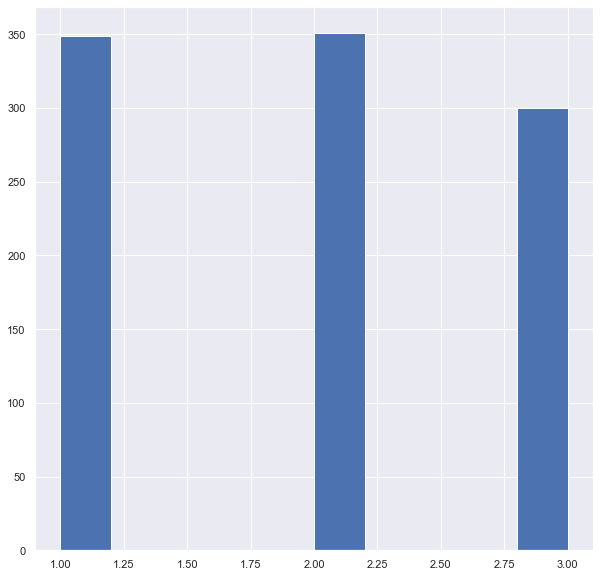

In [90]:
# we'll look at the distribution of data in some columns now
sns.set(rc={'figure.figsize':(10,10)})
plt.hist(df['policy_csl'])


we  can see that for almost all categories of CSL the data is uniformly distributed

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

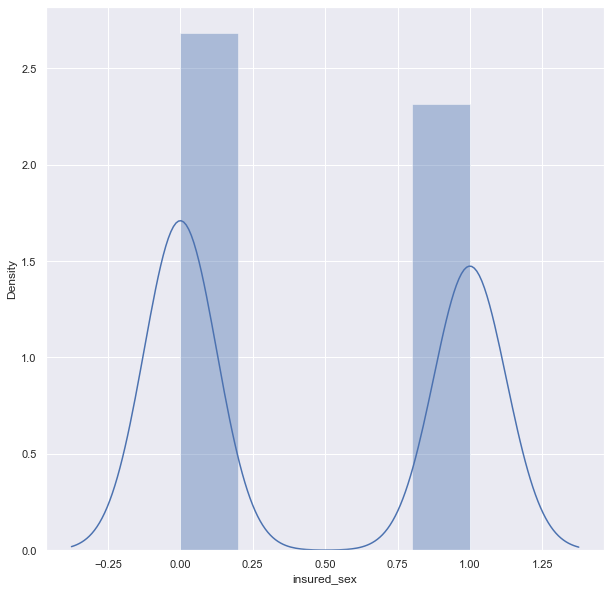

In [91]:
sns.distplot(df['insured_sex'])


we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

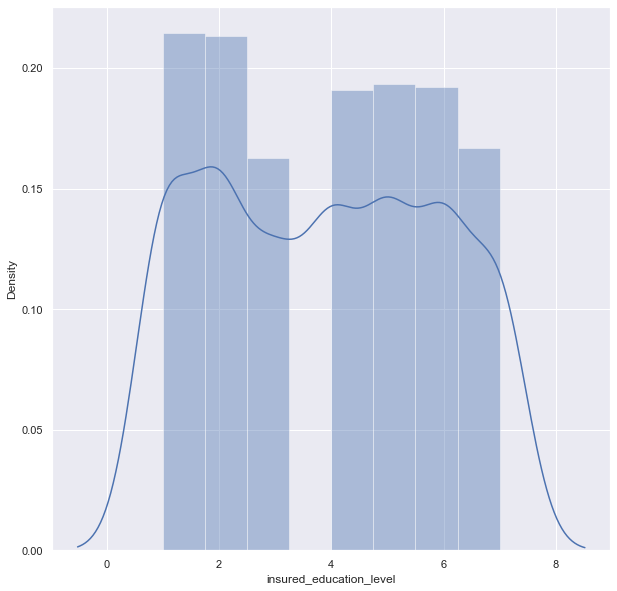

In [92]:
sns.distplot(df['insured_education_level'])


we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

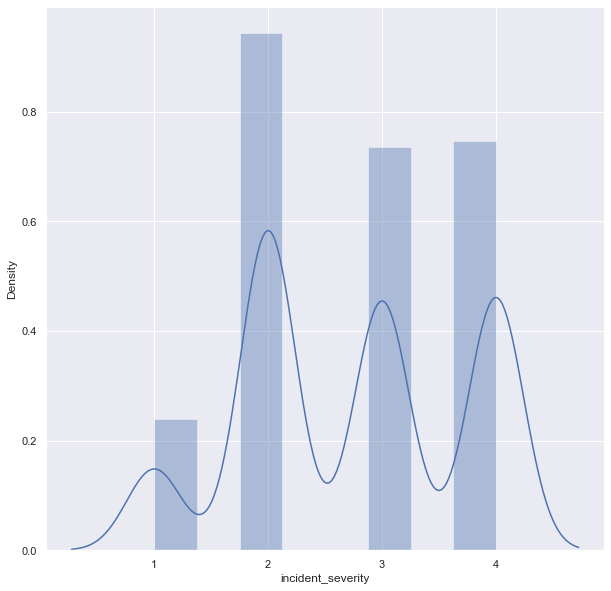

In [93]:
sns.distplot(df['incident_severity'])



We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.

correlation matrix-

<IPython.core.display.Javascript object>

<AxesSubplot:>

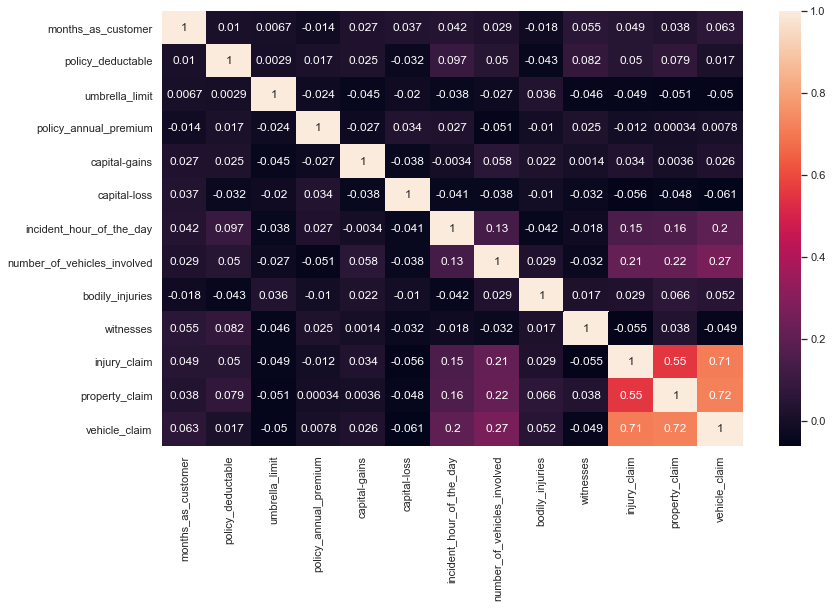

In [94]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

Scaling the numeric values in the dataset

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [96]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 13)

In [97]:
train_x

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving,husband,not-in-family,other-relative,own-child,unmarried,wife,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft,Ambulance,Fire,None,Other,Police,Front Collision,Rear Collision,Side Collision
253,440,2,500,1050.76,0,1,7,41500,-70200,3,21,1,0,2,3,0,5960,5960,41720,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
667,204,2,2000,1767.02,0,1,1,0,-49300,4,7,1,1,1,1,0,4200,8400,33600,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
85,275,1,2000,1514.72,0,1,2,35700,0,3,13,3,1,0,1,0,5830,11660,40810,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
969,398,2,500,862.19,0,1,2,69400,0,1,7,1,0,2,3,0,600,1200,4800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
75,120,1,1000,1425.54,0,0,2,78300,0,4,22,3,0,2,0,0,11380,5690,34140,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,370,3,2000,1389.13,7000000,1,1,0,-53200,2,6,1,0,0,2,0,900,1800,6300,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
192,359,1,2000,1367.68,0,0,6,0,0,4,13,1,0,0,3,0,5550,11100,38850,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
629,330,1,2000,1133.27,0,0,2,0,-56400,4,20,2,0,0,2,1,11000,5500,44000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
559,194,1,2000,1231.25,0,0,7,46500,0,2,15,3,0,1,0,0,4880,9760,39040,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [98]:
scaled_num_df

,months_as_customer,policy_deductable,umbrella_limit,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
253,2.012747,-1.022231,-0.495177,-0.843171,0.560692,-1.530640,1.302118,-0.825992,1.229008,1.327686,-0.302435,-0.314499,0.183090
667,-0.018986,1.435055,-0.495177,2.075988,-0.914177,-0.793281,-0.684837,-0.825992,0.016171,-0.453646,-0.666545,0.195020,-0.250726
85,0.592256,1.435055,-0.495177,1.047725,0.354566,0.946040,0.166715,1.137539,-1.196666,-0.453646,-0.329329,0.875771,0.134473
969,1.651167,-1.022231,-0.495177,-1.611699,1.552231,0.946040,-0.684837,-0.825992,1.229008,1.327686,-1.411315,-1.308478,-1.789385
75,-0.742145,-0.203136,-0.495177,0.684267,1.868528,0.946040,1.444044,1.137539,1.229008,-1.344312,0.818858,-0.370880,-0.221876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.410114,1.435055,2.506762,0.535875,-0.914177,-0.930874,-0.826763,-0.825992,-1.196666,0.437020,-1.349251,-1.183187,-1.709247
192,1.315415,1.435055,-0.495177,0.448455,-0.914177,0.946040,0.166715,-0.825992,-1.196666,1.327686,-0.387256,0.758833,0.029759
629,1.065753,1.435055,-0.495177,-0.506897,-0.914177,-1.043771,1.160193,0.155773,-1.196666,0.437020,0.740244,-0.410555,0.304901
559,-0.105076,1.435055,-0.495177,-0.107574,0.738387,0.946040,0.450566,1.137539,0.016171,-1.344312,-0.525866,0.479015,0.039910


In [99]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

In [100]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving,husband,not-in-family,other-relative,own-child,unmarried,wife,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft,Ambulance,Fire,None,Other,Police,Front Collision,Rear Collision,Side Collision
253,2,1,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
667,2,1,1,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
85,1,1,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
969,2,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
75,1,0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [101]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [102]:
num_df=test_x[['months_as_customer', 'policy_deductable', 'umbrella_limit','policy_annual_premium',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [103]:
scaled_data=scaler.transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=test_x.index)
scaled_num_df.shape

(250, 13)

In [104]:
test_x.drop(columns=scaled_num_df.columns, inplace=True)

In [105]:
test_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,adm-clerical,armed-forces,craft-repair,exec-managerial,farming-fishing,handlers-cleaners,machine-op-inspct,other-service,priv-house-serv,prof-specialty,protective-serv,sales,tech-support,transport-moving,husband,not-in-family,other-relative,own-child,unmarried,wife,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft,Ambulance,Fire,None,Other,Police,Front Collision,Rear Collision,Side Collision
993,2,1,6,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
859,3,1,7,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
298,3,0,6,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
553,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
672,1,0,4,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [106]:
test_x=pd.concat([scaled_num_df,test_x],axis=1)

Using the XGBoost algorithm to fit onto aur dataset.

In [107]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth = 5,min_child_weight = 1,n_estimators=80,gamma=0.01,subsample=0.8,learning_rate =0.001,scale_pos_weight = 3,reg_lambda=3,booster='gbtree',)

In [108]:
y_pred = xgb.fit(train_x, train_y).predict(test_x)

Finding accuracy of our model

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
ac2=accuracy_score(test_y,y_pred)
ac2

0.804

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
print('acc',accuracy_score(test_y,y_pred))
print('f1',classification_report(test_y,y_pred))
print('matrix',confusion_matrix(test_y,y_pred))

acc 0.804
f1               precision    recall  f1-score   support

           0       0.86      0.87      0.87       180
           1       0.66      0.63      0.64        70

    accuracy                           0.80       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.80      0.80      0.80       250

matrix [[157  23]
 [ 26  44]]


In [113]:
cn=list(test_x.columns)

In [114]:
import pickle
with open('frauddetect_pkl', 'wb') as files:
    pickle.dump([xgb,cn,scaler], files)